In [3]:
from pathlib import Path
import cv2
import numpy as np

def detect_court_lines(video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blurred, 50, 150)
        lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.imshow('Tennis Court Detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [4]:
import cv2
from pathlib import Path

def get_video_information(video_path: Path):
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened(): 
        print("Could not open:", video_path)
        return

    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    
    print({"# of frames": length, "width": width, "height": height, "fps": fps})
    
    cap.release()
    cv2.destroyAllWindows()
    return length, width, height, fps

In [5]:
test_recording_path = Path("/Users/adamwatson/Downloads/full-match-test-recording.mp4")
length, width, height, fps = get_video_information(test_recording_path)

{'# of frames': 151500, 'width': 854, 'height': 480, 'fps': 30.0}


In [8]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

def display_first_frame(video_path):
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened(): 
        print("Could not open:", video_path)
        cap.release()
        return
    ret, frame = cap.read()
    cap.release()  # Ensure proper release of the video capture object
    if not ret:
        print("Could not read first frame")
        return
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # plt.imshow(frame)
    # plt.axis("off")  # Hide axes
    # plt.title("First Frame")
    # plt.show()
    return frame

In [9]:
frame = display_first_frame(test_recording_path)

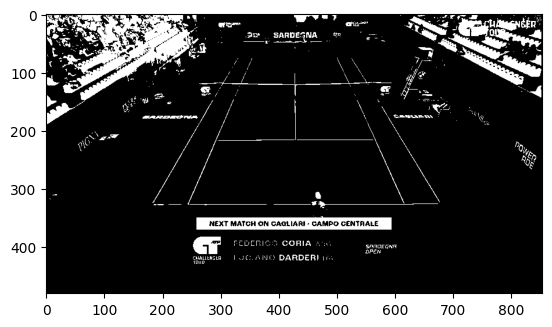

In [10]:
# get pixels with an intensity value of higher than 200 in a monochrome image of the court
court_mask = cv2.inRange(cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY), 175, 255)
plt.imshow(court_mask, cmap="gray")


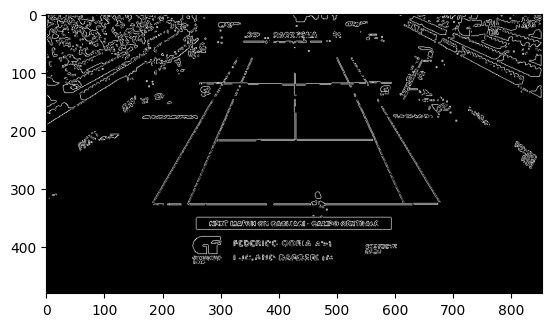

In [11]:
edges = cv2.Canny(court_mask,100,200)
plt.imshow(edges, cmap="gray")

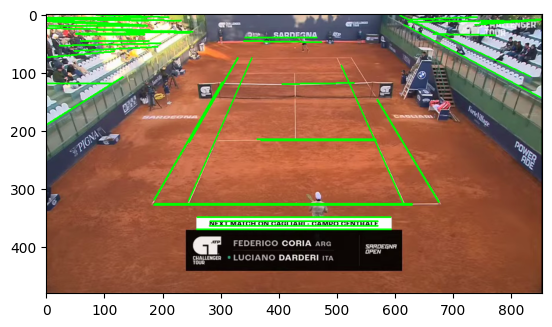

In [12]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=20)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(frame)

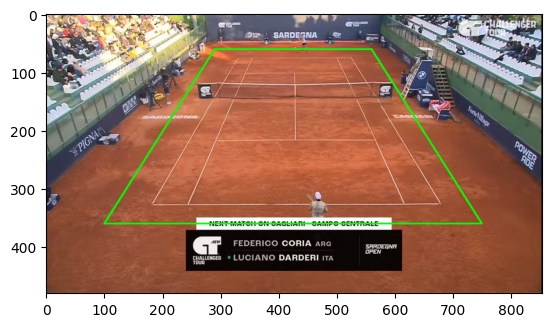

In [13]:
bounding_points = [(100, height - 120),(290, height - 420),  (560, height - 420),(750, height - 120)]
bounding_points = np.array(bounding_points, dtype=np.int32)  # Convert to numpy array
frame = display_first_frame(test_recording_path)
cv2.polylines(frame, [bounding_points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(frame)

In [41]:
import numpy as np
bounding_points = [(100, height - 120),(290, height - 420),  (560, height - 420),(750, height - 120)]
bounding_points = np.array(bounding_points, dtype=np.int32)  # Convert to numpy array
frame = display_first_frame(test_recording_path)
# cv2.polylines(frame, [bounding_points], isClosed=True, color=(0, 255, 0), thickness=2)
# plt.imshow(frame)
mask = np.zeros_like(frame, dtype=np.uint8)
cv2.fillPoly(mask, [bounding_points], (255, 255, 255))
masked_frame = cv2.bitwise_and(frame, mask)
# plt.imshow(masked_frame)

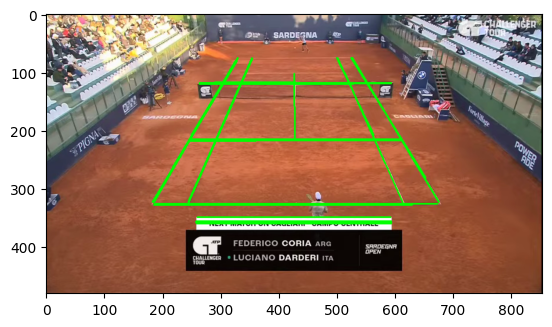

In [42]:
court_mask = cv2.inRange(cv2.cvtColor(masked_frame, cv2.COLOR_RGB2GRAY), 175, 255)
edges = cv2.Canny(court_mask,100,200)
plt.imshow(edges, cmap="gray")
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=100)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(frame)